## 11. **Api request**
 - Author: Santiago Trejo
 - Date: 29/08/2025
 - Goal: Aprender a efectuar llamadas API's

In [ ]:
import os
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv
load_dotenv()

True

In [47]:
url = "https://api.open-meteo.com/v1/forecast"
params = {
    'latitude':10.5,
    'longitude': -66.933333,
    'past_days':10,
    'hourly':'temperature_2m,relative_humidity_2m,wind_speed_10m'
}
response = requests.get(url, params = params)

In [48]:
if response.status_code == 200:
    data = response.json()
    print(f"Data retreive succesfuly: {data.keys()}")
else: 
    print(f"Error: {response.status_code}")

Data retreive succesfuly: dict_keys(['latitude', 'longitude', 'generationtime_ms', 'utc_offset_seconds', 'timezone', 'timezone_abbreviation', 'elevation', 'hourly_units', 'hourly'])


In [49]:
data

{'latitude': 10.5,
 'longitude': -67.0,
 'generationtime_ms': 0.11646747589111328,
 'utc_offset_seconds': 0,
 'timezone': 'GMT',
 'timezone_abbreviation': 'GMT',
 'elevation': 969.0,
 'hourly_units': {'time': 'iso8601',
  'temperature_2m': '°C',
  'relative_humidity_2m': '%',
  'wind_speed_10m': 'km/h'},
 'hourly': {'time': ['2025-08-20T00:00',
   '2025-08-20T01:00',
   '2025-08-20T02:00',
   '2025-08-20T03:00',
   '2025-08-20T04:00',
   '2025-08-20T05:00',
   '2025-08-20T06:00',
   '2025-08-20T07:00',
   '2025-08-20T08:00',
   '2025-08-20T09:00',
   '2025-08-20T10:00',
   '2025-08-20T11:00',
   '2025-08-20T12:00',
   '2025-08-20T13:00',
   '2025-08-20T14:00',
   '2025-08-20T15:00',
   '2025-08-20T16:00',
   '2025-08-20T17:00',
   '2025-08-20T18:00',
   '2025-08-20T19:00',
   '2025-08-20T20:00',
   '2025-08-20T21:00',
   '2025-08-20T22:00',
   '2025-08-20T23:00',
   '2025-08-21T00:00',
   '2025-08-21T01:00',
   '2025-08-21T02:00',
   '2025-08-21T03:00',
   '2025-08-21T04:00',
   '2025-

In [ ]:
df_weather = pd.DataFrame(data['hourly'])
df_weather['time'] = pd.to_datetime(df_weather['time'])
df_weather = df_weather.set_index('time')
df_weather = df_weather.rename(columns = {
    'temperature_2m':'temperature_c',
    'relative_humidity_2m':'relative_humidity_%', 
    'wind_speed_10m':'wind_speed_kmh'
    })

df_weather

,temperature_c,relative_humidity_%,wind_speed_kmh
time,,,
2025-08-20 00:00:00,23.7,88,4.3
2025-08-20 01:00:00,23.7,80,5.7
2025-08-20 02:00:00,23.5,77,6.3
2025-08-20 03:00:00,23.2,76,6.0
2025-08-20 04:00:00,22.9,76,6.6
...,...,...,...
2025-09-05 19:00:00,24.6,86,8.1
2025-09-05 20:00:00,24.0,88,7.2
2025-09-05 21:00:00,23.6,90,6.5


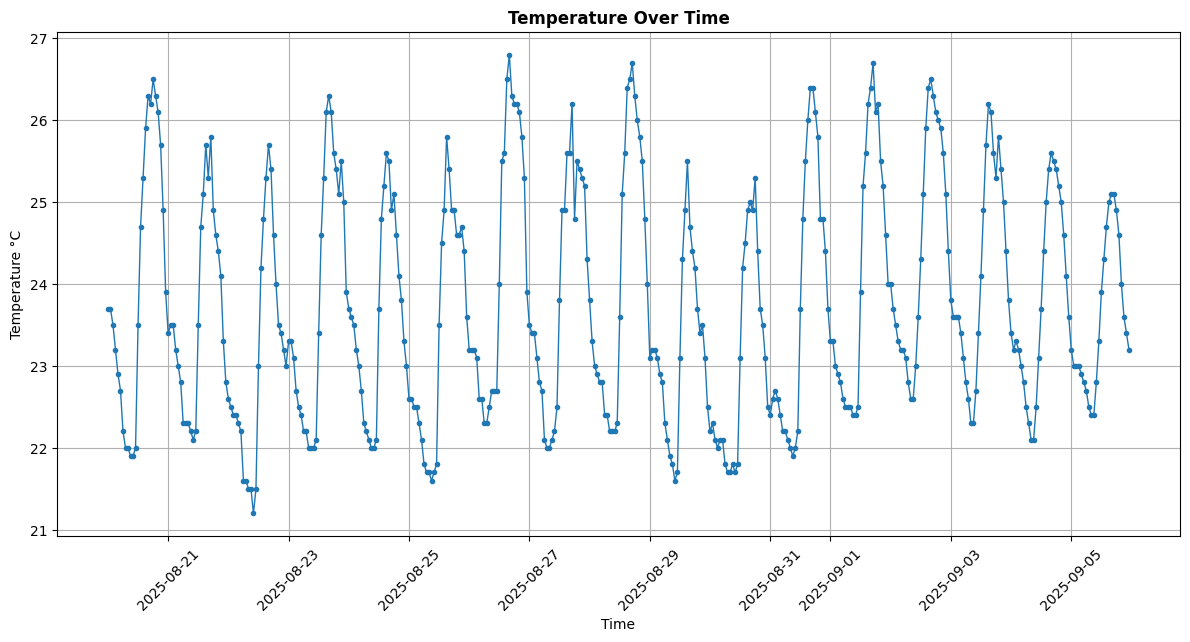

In [55]:
plt.figure(figsize=(12, 6))
plt.plot(
    df_weather.index, df_weather['temperature_c'], 
    marker='o', linestyle='-', linewidth = 1, markersize=3
    )
plt.title("Temperature Over Time", fontweight='bold')
plt.xlabel("Time")
plt.ylabel("Temperature °C")
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

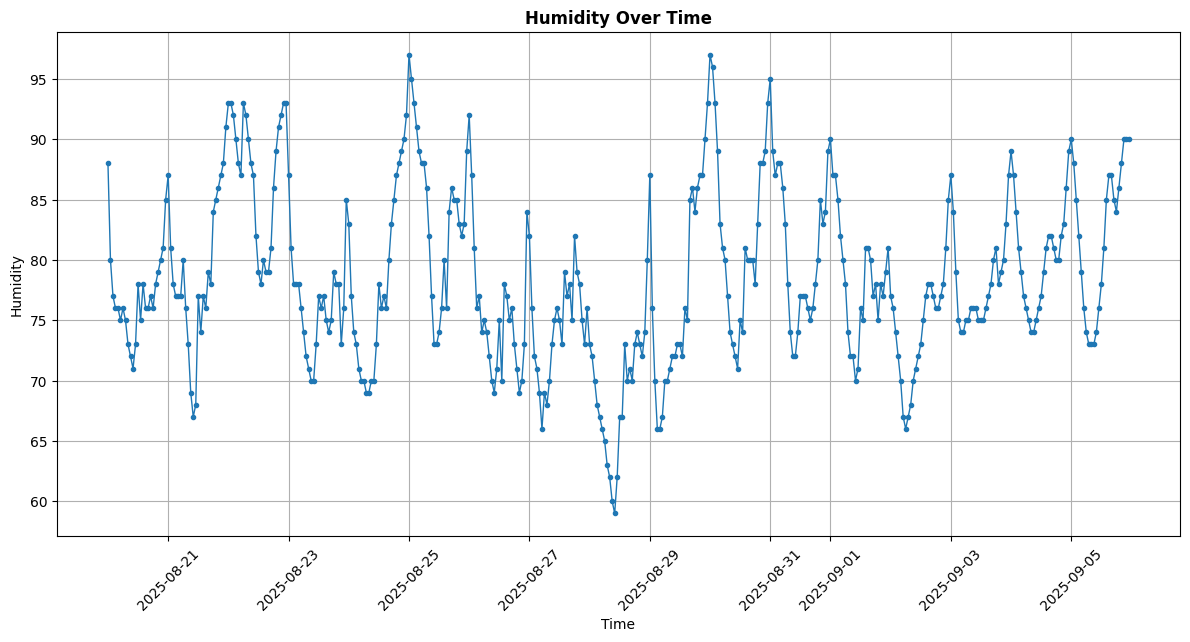

In [59]:
plt.figure(figsize=(12, 6))
plt.plot(
    df_weather.index, df_weather['relative_humidity_%'], 
    marker='o', linestyle='-', linewidth = 1, markersize=3
    )
plt.title("Humidity Over Time", fontweight='bold')
plt.xlabel("Time")
plt.ylabel("Humidity")
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

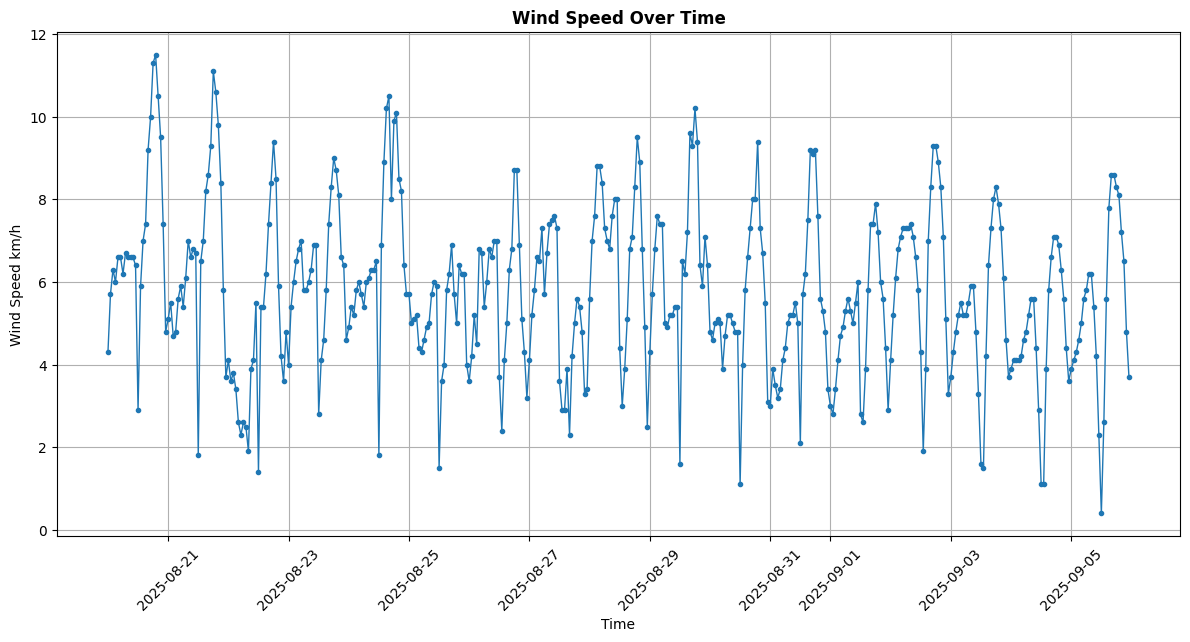

In [57]:
plt.figure(figsize=(12, 6))
plt.plot(
    df_weather.index, df_weather['wind_speed_kmh'], 
    marker='o', linestyle='-', linewidth = 1, markersize=3
    )
plt.title("Wind Speed Over Time", fontweight='bold')
plt.xlabel("Time")
plt.ylabel("Wind Speed km/h")
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

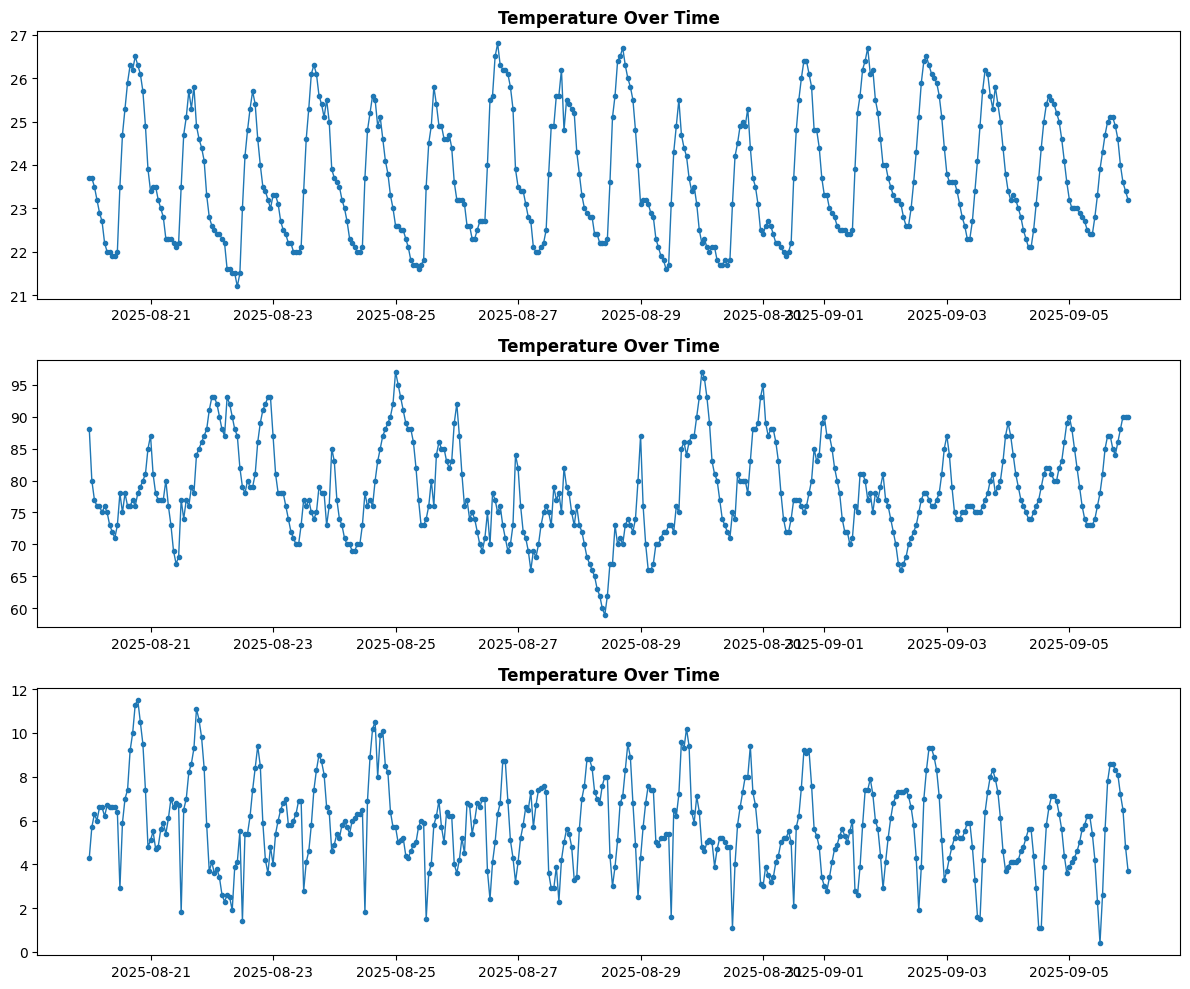

In [69]:
#Otra forma de graficar 
fig,(ax1,ax2,ax3) = plt.subplots(3,1,figsize=(12,10))

ax1.plot(df_weather.index, df_weather['temperature_c'], marker='o', linestyle='-', linewidth = 1, markersize=3)
ax1.set_title("Temperature Over Time", fontweight='bold')
ax2.plot(df_weather.index, df_weather['relative_humidity_%'], marker='o', linestyle='-', linewidth = 1, markersize=3)
ax2.set_title("Temperature Over Time", fontweight='bold')
ax3.plot(df_weather.index, df_weather['wind_speed_kmh'], marker='o', linestyle='-', linewidth = 1, markersize=3)
ax3.set_title("Temperature Over Time", fontweight='bold')

plt.tight_layout()
plt.show()

In [75]:
#COnexion a la api de spotify
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

spotify_Client = os.getenv("SPOTIFY_CLIENT")
spotify_Secret = os.getenv("SPOTIFY_SECRET")

In [76]:
sp = spotipy.Spotify(
    auth_manager= SpotifyClientCredentials(
        client_id=spotify_Client, client_secret= spotify_Secret
        )
        )

In [79]:
results = sp.search(q='feid', limit=20)
results

{'tracks': {'href': 'https://api.spotify.com/v1/search?offset=0&limit=20&query=feid&type=track',
  'limit': 20,
  'next': 'https://api.spotify.com/v1/search?offset=20&limit=20&query=feid&type=track',
  'offset': 0,
  'previous': None,
  'total': 111,
  'items': [{'album': {'album_type': 'single',
     'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/2LRoIwlKmHjgvigdNGBHNo'},
       'href': 'https://api.spotify.com/v1/artists/2LRoIwlKmHjgvigdNGBHNo',
       'id': '2LRoIwlKmHjgvigdNGBHNo',
       'name': 'Feid',
       'type': 'artist',
       'uri': 'spotify:artist:2LRoIwlKmHjgvigdNGBHNo'}],
     'available_markets': ['AR',
      'AU',
      'AT',
      'BE',
      'BO',
      'BR',
      'BG',
      'CA',
      'CL',
      'CO',
      'CR',
      'CY',
      'CZ',
      'DK',
      'DO',
      'DE',
      'EC',
      'EE',
      'SV',
      'FI',
      'FR',
      'GR',
      'GT',
      'HN',
      'HK',
      'HU',
      'IS',
      'IE',
      'IT',
      '

In [80]:
for idx,track in enumerate(results['tracks']['items']):
    print(f"{idx}: {track['name']}")

0: SORRY 4 THAT MUCH
1: Verano Rosa
2: LUNA
3: Faded
4: Brickell
5: PERRO NEGRO
6: CHORRITO PA LAS ANIMAS
7: CLASSY 101
8: SE LO JURO MOR
9: FERXXO 151
10: Faded
11: Yandel 150
12: +57
13: ALAKRAN
14: Hey Mor
15: Ferxxo 100
16: Feliz Cumpleaños Ferxxo
17: Le Pido a DIOS
18: Faded Pictures
19: CLASSY 101
